# 1. Genere una muestra de casos

* Utilice los últimos 4 dígitos de su rut como semilla pseudoaleatoria.
* Seleccione el 50% de los casos.
* Cada base generada debe contener los siguientes elementos:
  * El índice de desarrollo humano (undp_hdi).
  * El nombre del país (ccodealp).
  * La región a la que pertenece (ht_region).
  * El PIB per capita. (gle_cgdpc).
  * El total de la población (imf_pop).

...

* Si su apellido está entre la N y la Z, escoja las siguientes variables del módulo Salud:
  * wef_imort: Infant mortality, deaths/1000 live births.
  * who_alc2000: Alcohol consumption per capita (2000-).
  * who_tobt: Current smoking of any tobacco product (Total).
  * wdi_exph: Government expenditure on health, total (% of GDP).
  * Guarde esta tabla procesada en un nuevo objeto.
  * Renombre las categorías de la variable ht_region de números a regiones.







In [1]:
import pandas as pd

df = pd.read_csv('qog_std_cs_jan18.csv')#, sep=';', decimal=',')
print(f'Shape: {df.shape}')
df.head()

# Pablo maluenda compañero revisión
# Mi correo es pmaluenda89@gmail.com


Shape: (194, 1882)


,ccode,cname,ccodealp,ccodecow,ccodewb,version,aid_cpnc,aid_cpsc,aid_crnc,aid_crnio,...,wvs_relacc,wvs_relsch,wvs_relsci,wvs_satfin,wvs_satlif,wvs_screl,wvs_subh,wvs_survself,wvs_tradrat,wvs_trust
0,4,Afghanistan,AFG,700.0,4.0,QoGStdCSJan18,NaN,NaN,29.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8,Albania,ALB,339.0,8.0,QoGStdCSJan18,NaN,NaN,26.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12,Algeria,DZA,615.0,12.0,QoGStdCSJan18,NaN,NaN,21.0,6.0,...,3.710616,1.704692,3.681347,5.988125,6.301029,5.339371,3.805579,-0.409807,-0.498164,0.179286
3,20,Andorra,AND,232.0,20.0,QoGStdCSJan18,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24,Angola,AGO,540.0,24.0,QoGStdCSJan18,NaN,NaN,22.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
variables = ['undp_hdi', 'ccodealp', 'ht_region', 'gle_cgdpc', 'imf_pop'
              , 'wef_imort', 'who_alc2000', 'who_tobt', 'wdi_exph']
subsample = df[variables].sample(frac=0.5, random_state=3245)
print(f'Shape: {subsample.shape}')
subsample.head()

Shape: (97, 9)


,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph
2,0.743,DZA,3,5402.1699,39.113998,17.200001,0.53,NaN,7.207178
34,0.394,TCD,4,1651.0500,NaN,89.400002,0.64,NaN,3.621164
0,0.479,AFG,8,1282.6400,29.825001,NaN,0.01,NaN,8.182274
109,0.779,MUS,4,10944.5400,1.261000,13.000000,3.03,21.900000,4.809545
113,0.701,MDA,1,4207.8701,3.555000,15.100000,9.99,23.799999,10.323656


In [3]:
regiones = {1:'EastEurope', 2: 'LatAm', 3: 'NorthAfrica',4: 'SubSaharian', 5:'WesternDem', 
            6: 'EastAsia',7:'SouthEastAsia',8:'SouthAsia', 9:'Pacific', 10:'Caribbean' }

df['ht_region'] = df['ht_region'].replace([1,2,3,4,5,6,7,8,9,10],
                                                       ['EastEurope','LatAm','NorthAfrica','SubSaharian','WesternDem', 
                                                        'EastAsia','SouthEastAsia','SouthAsia', 'Pacific', 'Caribbean'])


subsample['ht_region'] = subsample['ht_region'].replace([1,2,3,4,5,6,7,8,9,10],
                                                       ['EastEurope','LatAm','NorthAfrica','SubSaharian','WesternDem', 
                                                        'EastAsia','SouthEastAsia','SouthAsia', 'Pacific', 'Caribbean'])
subsample.head()


,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph
2,0.743,DZA,NorthAfrica,5402.1699,39.113998,17.200001,0.53,NaN,7.207178
34,0.394,TCD,SubSaharian,1651.0500,NaN,89.400002,0.64,NaN,3.621164
0,0.479,AFG,SouthAsia,1282.6400,29.825001,NaN,0.01,NaN,8.182274
109,0.779,MUS,SubSaharian,10944.5400,1.261000,13.000000,3.03,21.900000,4.809545
113,0.701,MDA,EastEurope,4207.8701,3.555000,15.100000,9.99,23.799999,10.323656


# 2. Genere una función que ingrese su objeto y devuelva:

Por cada variable existente en su objeto, calcule las medidas descriptivas para los casos continuos.
  * Para cada variable discreta, que calcule la frecuencia.
  * Reporte las estadísticas descriptivas para gle_cgdpc, undp_hdi, imf_pop.
Compare las estadísticas con algún compañero. ¿Ve alguna diferencia sustancial en alguna de ellas?

RP. No pude comparar las variables del modulo salud con mi compañero (Pablo Maluenda) porque teníamos los set cambiados, pero que las en común estaban similares, no se notaban diferencias sustanciales.


In [4]:
def descrive_obj(df):

  for column in df.columns:
    if df[column].dtype == 'float64':
      print('')
      print(column.upper(),': Variable Continua')
      print(df[column].describe())
      

    elif (df[column].dtype == 'object') or (df[column].dtype == 'int64'):
      print('')
      print(column.upper(),': Variable Discreta')
      print(df[column].value_counts())

    else:
      print('Error en tipo de dato')

descrive_obj(subsample)
#subsample.


UNDP_HDI : Variable Continua
count    93.000000
mean      0.672441
std       0.150739
min       0.347000
25%       0.555000
50%       0.701000
75%       0.779000
max       0.948000
Name: undp_hdi, dtype: float64

CCODEALP : Variable Discreta
DZA    1
ECU    1
KEN    1
QAT    1
THA    1
      ..
TWN    1
ARG    1
SRB    1
MNE    1
IDN    1
Name: ccodealp, Length: 97, dtype: int64

HT_REGION : Variable Discreta
SubSaharian      23
EastEurope       15
WesternDem       10
NorthAfrica       9
LatAm             9
SouthAsia         8
Caribbean         7
SouthEastAsia     7
Pacific           6
EastAsia          3
Name: ht_region, dtype: int64

GLE_CGDPC : Variable Continua
count        97.000000
mean      12484.472096
std       18005.530733
min         644.539980
25%        2246.820100
50%        5639.020000
75%       14711.970000
max      108481.130000
Name: gle_cgdpc, dtype: float64

IMF_POP : Variable Continua
count     74.000000
mean      24.706000
std       46.704288
min        0.012000


3. Genere una función que liste las observaciones perdidas de una
variable
* La función debe contener los siguientes argumentos:
  * dataframe: La función debe ingresar un objeto DataFrame.
  * var: Variable a inspeccionar.
  * print_list: Opción para imprimir la lista de observaciones perdidas en la
  variable. Debe ser False por defecto.
* La función debe retornar la cantidad de casos perdidos y el porcentaje
correspondiente.
* Cuando print_list = True, debe retornar la lista de casos.
* Analice todas las variables y sus casos perdidos.
Para las 3 variables con un mayor porcentaje de casos perdidos, solicite la lista de países con ausencia de datos.


In [5]:
def list_nan(df , var, print_list = False):

  filter = df[var].isna()

  if print_list:
    return df[filter]
  else:
    return filter.sum() , filter.sum()/len(df[var])



nans = {}
for column in subsample.columns:
  _ , perc = list_nan(subsample,column)
  nans[column] = perc

print(nans)
nans = sorted(nans, key=nans.get, reverse=True)
print('Ranking:',nans)

print('\nLista de países con ausencia de datos para las 3 variables con un mayor porcentaje de casos perdidos')
for var in nans[:3]:
  print("")
  print('Variable: ', var.upper())
  print(list_nan(subsample, var, print_list = True)['ht_region'].unique())

{'undp_hdi': 0.041237113402061855, 'ccodealp': 0.0, 'ht_region': 0.0, 'gle_cgdpc': 0.0, 'imf_pop': 0.23711340206185566, 'wef_imort': 0.21649484536082475, 'who_alc2000': 0.061855670103092786, 'who_tobt': 0.3711340206185567, 'wdi_exph': 0.010309278350515464}
Ranking: ['who_tobt', 'imf_pop', 'wef_imort', 'who_alc2000', 'undp_hdi', 'wdi_exph', 'ccodealp', 'ht_region', 'gle_cgdpc']

Lista de países con ausencia de datos para las 3 variables con un mayor porcentaje de casos perdidos

Variable:  WHO_TOBT
['NorthAfrica' 'SubSaharian' 'SouthAsia' 'Caribbean' 'LatAm' 'Pacific'
 'EastEurope' 'EastAsia' 'SouthEastAsia' 'WesternDem']

Variable:  IMF_POP
['SubSaharian' 'NorthAfrica' 'SouthAsia' 'LatAm' 'WesternDem' 'EastAsia'
 'EastEurope']

Variable:  WEF_IMORT
['SouthAsia' 'Pacific' 'SubSaharian' 'Caribbean' 'WesternDem' 'LatAm']


# 4. Grafique histogramas indicando medias muestral y total

Genere una nueva función que grafique un histograma de una variable entregada
para un DataFrame de muestra. El gráfico debe además señalar las medias de la
variable entregada, tanto para el DataFrame de muestra entregado, como para el
DataFrame completo correspondiente.
* La función debe incluir los siguientes argumentos:
  * sample_df: La base de datos donde se encuentran los datos específicos
  (muestra).
  * full_df: La base de datos donde se encuentran todos los datos (contiene
  los datos de la muestra).
  * var: La variable a graficar.
  * sample_mean: Booleano. Si es verdadero, debe generar una recta vertical
  indicando la media de la variable en la selección muestral (sample_df). Por
  defecto debe ser False.
  * true_mean: Booleano. Si es verdadero, debe generar una recta vertical
  indicando la media de variable en la base de datos completa (full_df).
* Implemente las funciones para las 4 variables seleccionadas según su grupo.
¿En qué variables la media de la muestra es mayor a la de los datos completos?



In [6]:
%matplotlib inline
# importamos la triada de Data Science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# importamos scipy.stats que ayudará a generar distribuciones
import scipy.stats as stats

plt.style.use('seaborn-whitegrid') # Gráficos estilo seaborn
plt.rcParams["figure.figsize"] = (10, 20) # Tamaño gráficos


In [7]:
def histogram (sample_df, full_df, var, true_mean, sample_mean = False):
  # vamos a eliminar los datos perdidos en la columna con dropna()
  var_dropna = sample_df[var].dropna()
  
  plt.hist(var_dropna, color='blue', alpha=.4, bins=30)
  if sample_mean:
    plt.axvline(var_dropna.mean(), color = 'dodgerblue', linestyle ='--')
    
  if true_mean:
    plt.axvline(full_df[var].dropna().mean(), color = 'tomato', linestyle ='--');
    
  plt.title('Distribución empírica de la variable {} {}'.format(('continua' if sample_df[var].dtype == 'float64' else 'discreta'),var.upper()));
    
  return 1

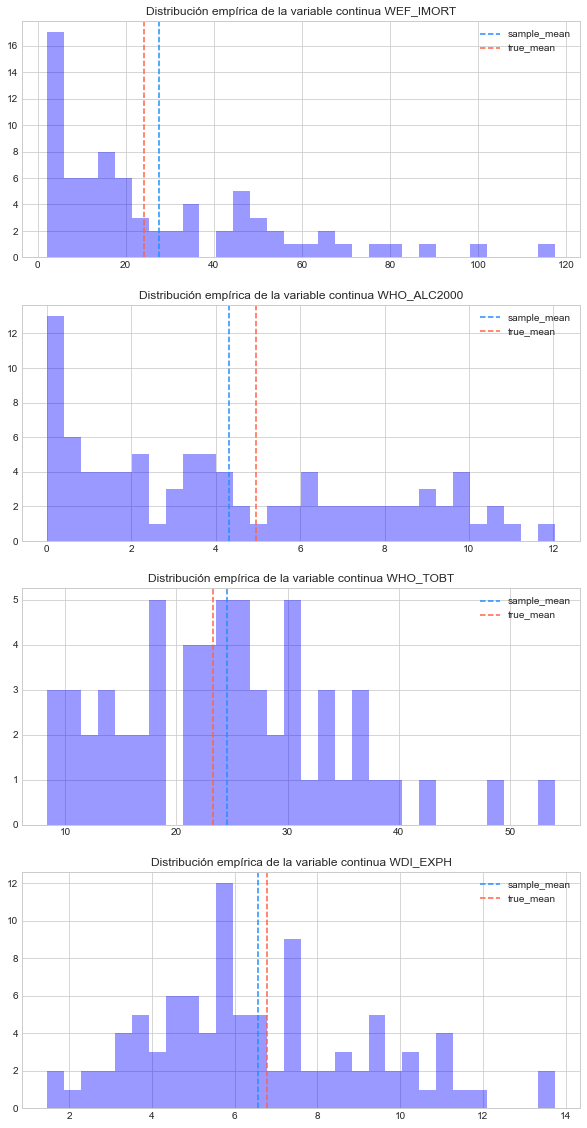

In [8]:
vars = ['wef_imort', 'who_alc2000', 'who_tobt', 'wdi_exph']

row = 1
for var in vars:
  plt.subplot(len(vars), 1, row)
  histogram(subsample, df, var, True, True)
  plt.legend(["sample_mean", "true_mean"], loc ="upper right")
  row += 1
#  print(item[0])

¿En qué variables la media de la muestra es mayor a la de los datos completos?
RP. para WEF_IMORT y WHO_TOBT, 

# 5. Genere una función que devuelva un dotplot con las medias por región para una variable entregada

* Cada “punto” del dotplot debe representar la media, o mediana, de una variable para una región específica.
* La función debe contener los siguientes parámetros:
    * dataframe: La tabla de datos donde buscar las variables.
    * plot_var: Corresponde a una columna del dataframe entregado, de la cual se desea obtener la métrica (puede ser media o mediana).
    * plot_by: Corresponde a otra columna del dataframe entregado. Es la columna por la cual se quiere agrupar el dataframe, para acceder luego a la columna entregada en plot_var. Tip: Revise el uso del método groupby de pandas.
    * statistic: Debe presentar dos opciones; "mean" para la media y "median" para la mediana. Por defecto debe ser "mean".
    * global_stat: Booleano. Si es True, debe graficar la media (o mediana, según lo indicado en statistic) de la variable plot_var entregada, sin agrupar (para todos los datos entregados en dataframe). Por defecto debe ser False.
* Implemente la función en las 3 variables con una menor cantidad de datos perdidos.



In [9]:
def dotplot(df, plot_var, plot_by, statistic = 'mean', global_stat = False):
    
    if statistic == 'mean':
        group = round( df.groupby(plot_by)[plot_var].mean() , 2)
        vline = df[plot_var].mean()
    else:
        group = round( df.groupby(plot_by)[plot_var].median() , 2)
        vline = df[plot_var].median()

    plt.rcParams["figure.figsize"] = (5, 5) # Tamaño gráficos
    plt.title(statistic+' '+plot_var+' by '+plot_by)
    plt.plot(group.values , group.index, 'o', color = 'blue')

    if global_stat:
        plt.axvline(vline, color = 'tomato' , linestyle = '--')

# Eliminamos las variables discretas
nans.remove('ht_region')
nans.remove('ccodealp')
print('Variables con menor cantidad de datos perdidos:')
for plot_var in nans[-3:]:
    print('  '+plot_var)

Variables con menor cantidad de datos perdidos:
  undp_hdi
  wdi_exph
  gle_cgdpc


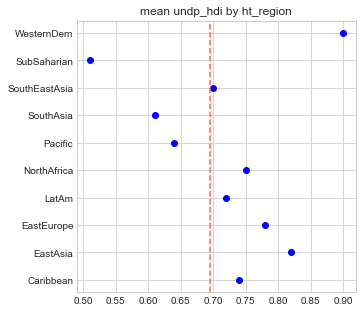

In [10]:
dotplot(df, plot_var = 'undp_hdi', plot_by = 'ht_region', statistic = 'mean', global_stat = True)

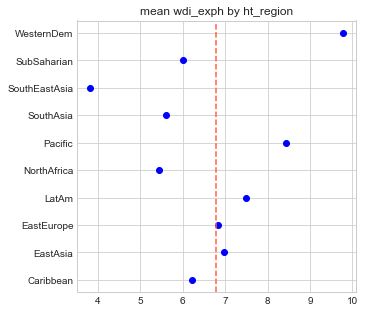

In [11]:
dotplot(df, plot_var = 'wdi_exph', plot_by = 'ht_region', statistic = 'mean', global_stat = True)

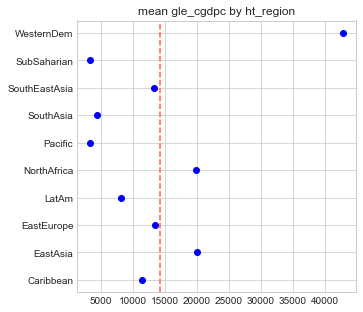

In [12]:
dotplot(df, plot_var = 'gle_cgdpc', plot_by = 'ht_region', statistic = 'mean', global_stat = True)

# 6. Guarde la base de datos
● La submuestra creada tiene un método llamado to_csv. Acceda a este y guarde la base de datos con la siguiente nomenclatura:
subsample_\<iniciales\>_demo.csv.
(Subela a la plataforma, junto al desafío)


In [13]:
subsample.to_csv('subsample_PCNC_demo.csv')